## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./chronic_kidney_disease_full.csv')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer: Class, since it defines whether someone has CKD, blood cell counts, and then maybe explore using a pairplot or correlation matrix to identify other meaningful realtionships among continuous variables and the histograms of continuous relationships.

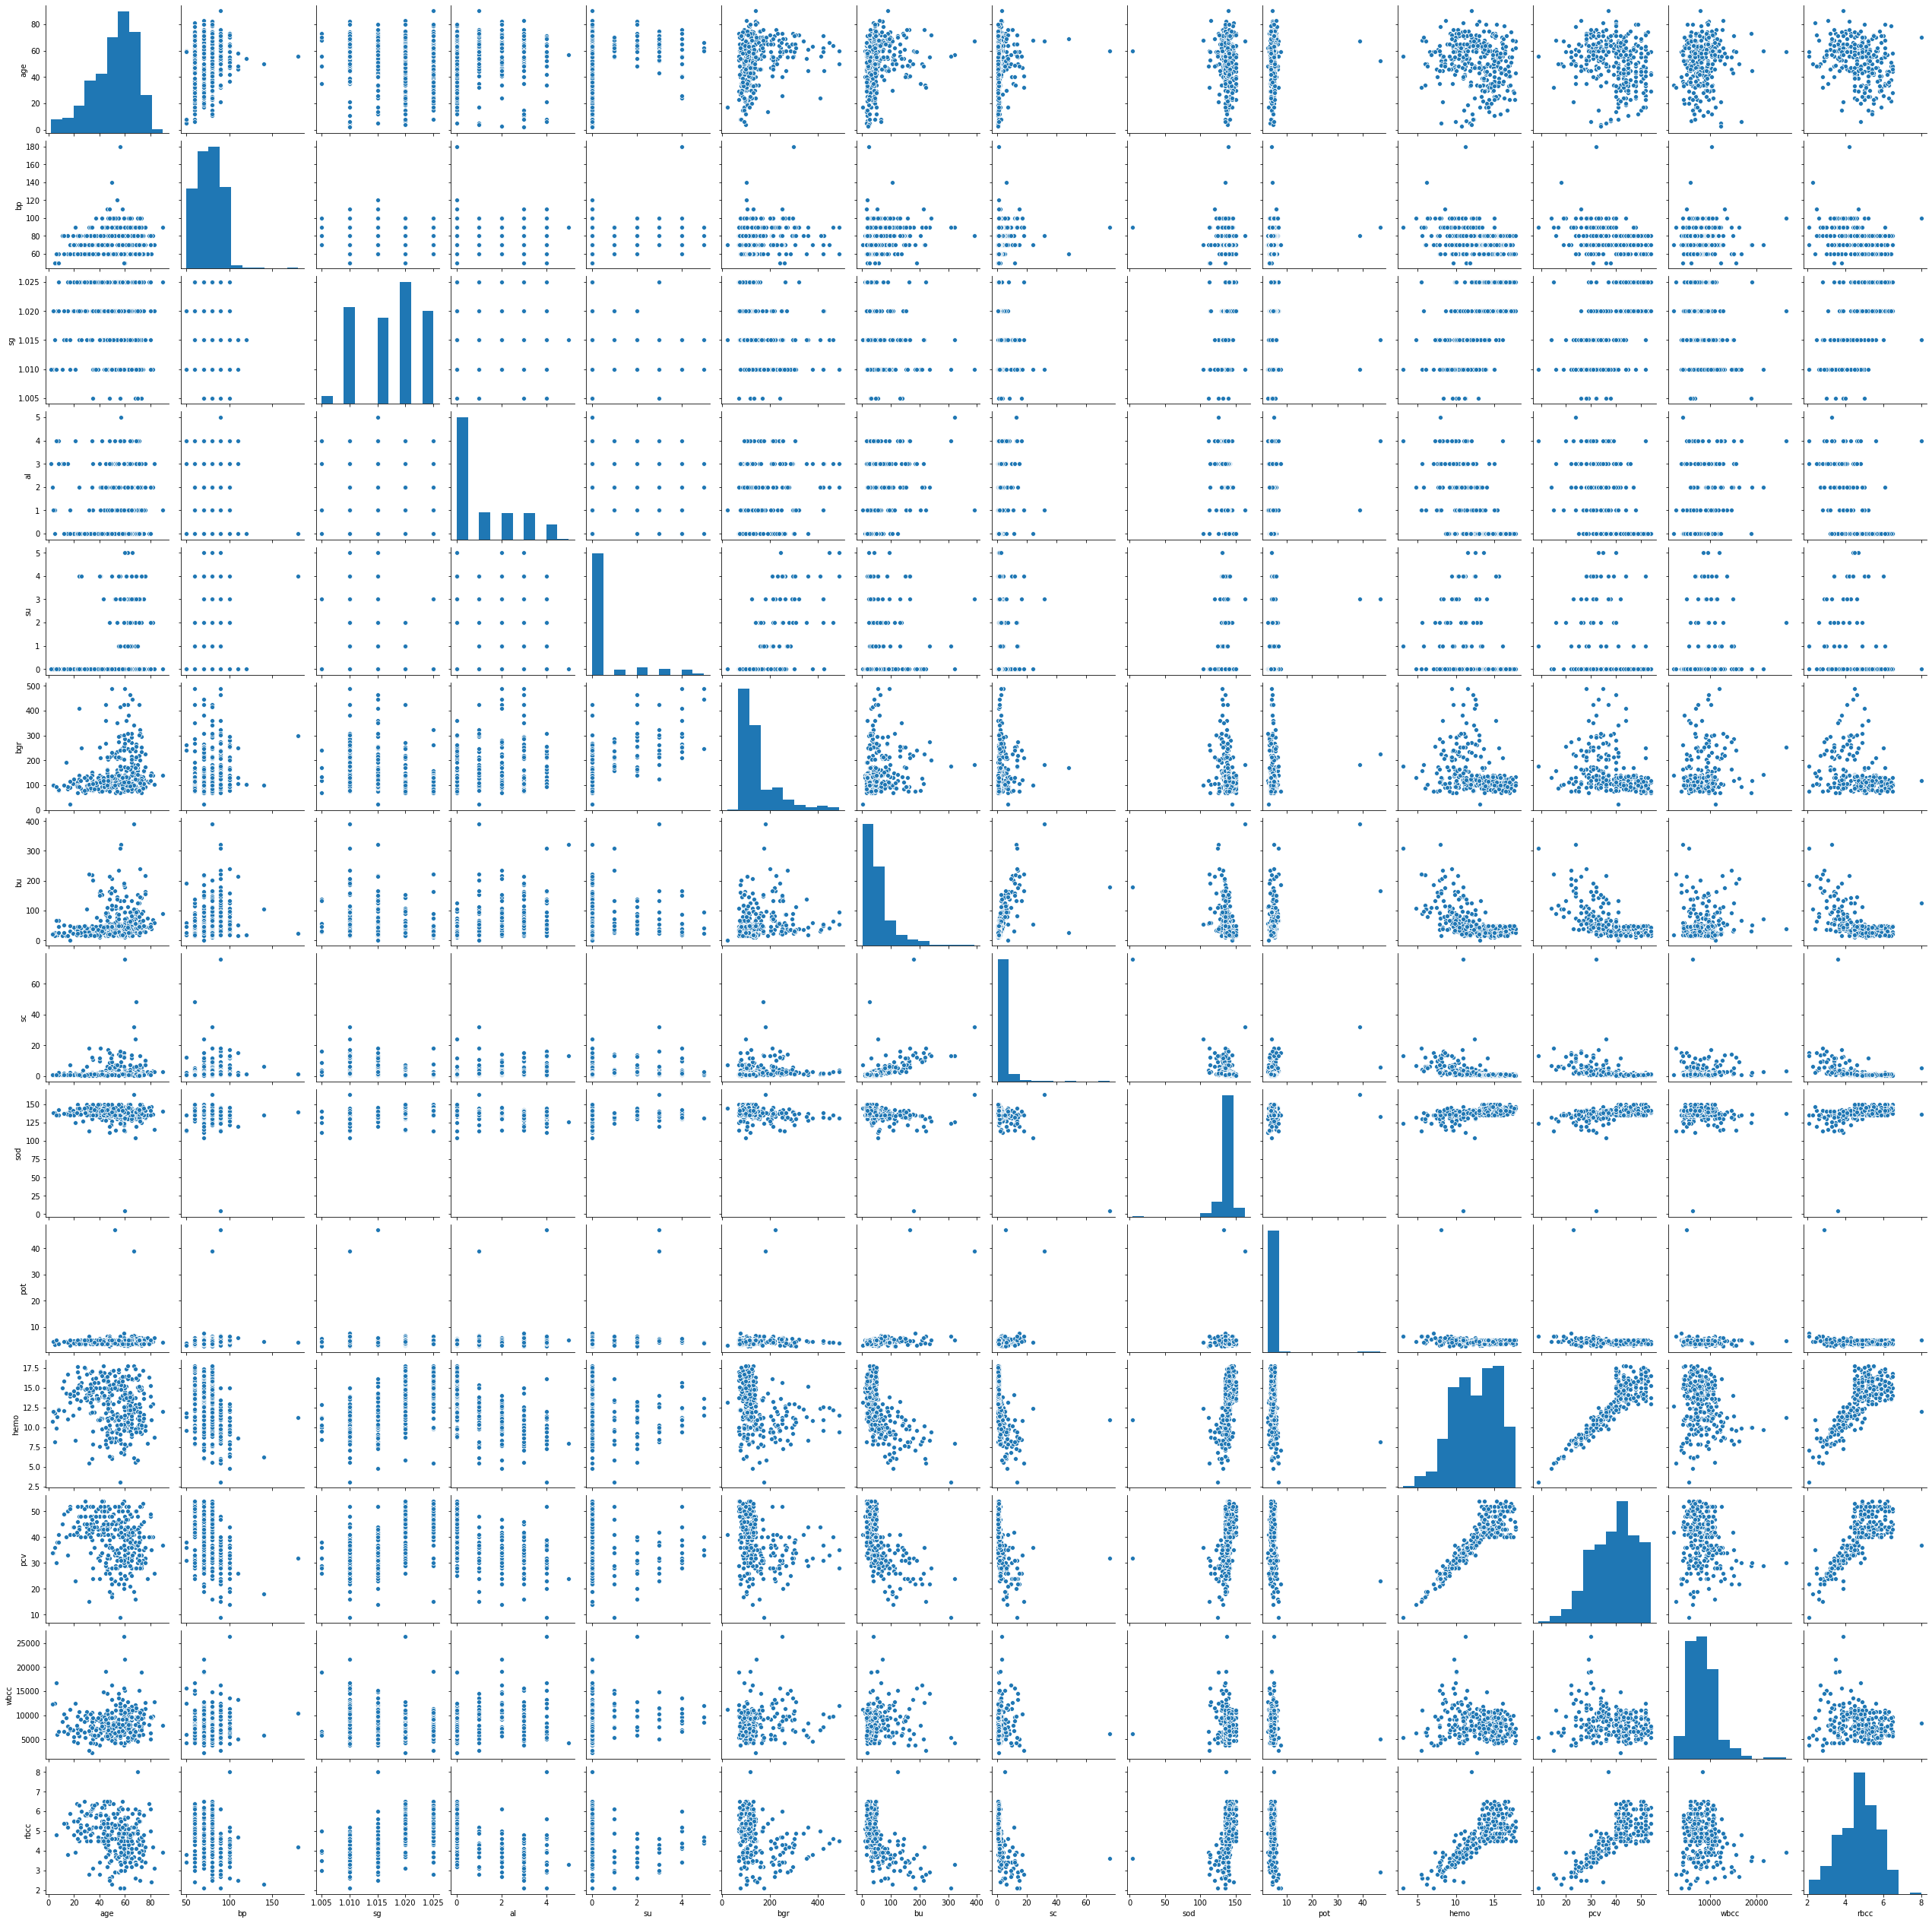

In [4]:
sns.pairplot(df)

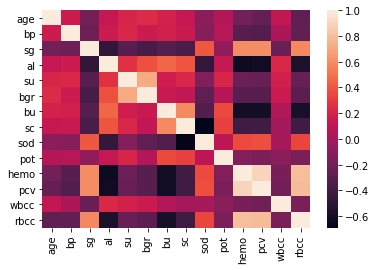

In [5]:
sns.heatmap(df.corr())

In [6]:
df.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [9]:
df.shape

(400, 25)

In [10]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

In [11]:
dropped = df.dropna()
dropped

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [12]:
400-158

242

In [13]:
242/400

0.605

Answer: We lose aboput 60% of the dataset. Unacceptable. Missing values might have meaning, and missing data for one variable per observation does not necessarily mean the entire observation should be dropped.

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: 
1. Bad handwriting (a medical classic) or other human-related falty data entry/recording.
2. Some answers could be subjective if lacking SOPs for coding. What's the difference between good and poor and is it constient between medical staff?
3. Oher human errors like losing or confusing charts.

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: Uh... if this is a lateral thinking sort of excercise, we'd just tell everyone they have it?

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: optimized sensitivity, minimizing false negatives.

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: Well, in addition to the emotional strife of being given a false positive, individuals would probably have unnecessary medical costs assocaited with further testing. 

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: Tell everyone they don't have it.

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: optimioze for specificity, minimizing false positives. 

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: Emotional strife of then finding out one DID have CKD after being told they did not. This could lead to more severe health issues and death if untreated. 

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [14]:
# Transform class to pkd indicator:
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [16]:
df['class'] = df['class'].map({'ckd':1, 'notckd':0})
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [17]:
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [19]:
# Interaction terms:
# Strong correlations are present among several blood-related variables, including hemogloben, 
# red blood cell count, white blood cell count, and packed cell volume.
# I'm not sure what the relationship is between hemogloben and packed cell volume, but creating 
# an interaction term between red and white blood cell counts might help predict CKD.
# The data dictionary also presents pus cells and pus cell clumps, which seem related. 

In [24]:
df['redwhite_int'] = df['wbcc']*df['rbcc']

In [31]:
df['pc'].value_counts()

0.0    259
1.0     76
Name: pc, dtype: int64

In [28]:
# pc to indicator:
df['pc'] = df['pc'].map({'abnormal':1, 'normal':0})

In [32]:
df['pc'].value_counts()

0.0    259
1.0     76
Name: pc, dtype: int64

In [30]:
# pcc to indicator:
df['pcc'] = df['pcc'].map({'present':1, 'notpresent':0})

In [33]:
df['pcc'].value_counts()

0.0    354
1.0     42
Name: pcc, dtype: int64

In [34]:
# pc/pcc interaction:
df['pus_int'] = df['pc']*df['pcc']

In [35]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rbcc,htn,dm,cad,appet,pe,ane,class,redwhite_int,pus_int
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,notpresent,121.0,...,5.2,yes,yes,no,good,no,no,1,40560.0,0.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,notpresent,NaN,...,NaN,no,no,no,good,no,no,1,NaN,0.0
2,62.0,80.0,1.010,2.0,3.0,normal,0.0,0.0,notpresent,423.0,...,NaN,no,yes,no,poor,no,yes,1,NaN,0.0
3,48.0,70.0,1.005,4.0,0.0,normal,1.0,1.0,notpresent,117.0,...,3.9,yes,no,no,poor,yes,yes,1,26130.0,1.0
4,51.0,80.0,1.010,2.0,0.0,normal,0.0,0.0,notpresent,106.0,...,4.6,no,no,no,good,no,no,1,33580.0,0.0


In [36]:
df.dtypes

age             float64
bp              float64
sg              float64
al              float64
su              float64
rbc              object
pc              float64
pcc             float64
ba               object
bgr             float64
bu              float64
sc              float64
sod             float64
pot             float64
hemo            float64
pcv             float64
wbcc            float64
rbcc            float64
htn              object
dm               object
cad              object
appet            object
pe               object
ane              object
class             int64
redwhite_int    float64
pus_int         float64
dtype: object

In [37]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'redwhite_int', 'pus_int'],
      dtype='object')

In [ ]:
# Create indicator variables from remaining object types, then drop superfluous indicators (y, interaction terms):

In [41]:
df = pd.get_dummies(df)

In [43]:
df.dtypes

age              float64
bp               float64
sg               float64
al               float64
su               float64
pc               float64
pcc              float64
bgr              float64
bu               float64
sc               float64
sod              float64
pot              float64
hemo             float64
pcv              float64
wbcc             float64
rbcc             float64
class              int64
redwhite_int     float64
pus_int          float64
rbc_abnormal       uint8
rbc_normal         uint8
ba_notpresent      uint8
ba_present         uint8
htn_no             uint8
htn_yes            uint8
dm_no              uint8
dm_yes             uint8
cad_no             uint8
cad_yes            uint8
appet_good         uint8
appet_poor         uint8
pe_no              uint8
pe_yes             uint8
ane_no             uint8
ane_yes            uint8
dtype: object

In [44]:
# Define X, drop superfluous:
X = df.drop(columns = ['pc',
                       'pcc',
                       'class',
                       'rbc_normal',
                       'ba_notpresent',
                       'htn_no',
                       'dm_no',
                       'cad_no',
                       'appet_good',
                       'pe_no',
                       'ane_no'])

In [45]:
X

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,redwhite_int,pus_int,rbc_abnormal,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,40560.0,0.0,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,NaN,0.0,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,NaN,0.0,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,26130.0,1.0,0,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,33580.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,32830.0,0.0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,48360.0,0.0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,35640.0,0.0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,42480.0,0.0,0,0,0,0,0,0,0,0


In [63]:
# Impute median values for missing data: 
# (This seems risky, but I'm told we cover better practices in a future lesson?)

X = X.fillna(X.median())

In [64]:
X.isnull().sum()

age             0
bp              0
sg              0
al              0
su              0
bgr             0
bu              0
sc              0
sod             0
pot             0
hemo            0
pcv             0
wbcc            0
rbcc            0
redwhite_int    0
pus_int         0
rbc_abnormal    0
ba_present      0
htn_yes         0
dm_yes          0
cad_yes         0
appet_poor      0
pe_yes          0
ane_yes         0
dtype: int64

In [65]:
y = df['class']

In [66]:
y.value_counts()

1    250
0    150
Name: class, dtype: int64

In [68]:
# Import Test, Train, Split:

from sklearn.model_selection import train_test_split

In [69]:
# Test Train Split:

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [70]:
# Import LogisticRegression, StandardScaler, and GridSearchCV

from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [76]:
# Attempt with scaling:

sc = StandardScaler()

In [77]:
X_train_sc = sc.fit_transform(X_train, y_train)

In [78]:
X_test_sc = sc.transform(X_test)

In [104]:
# Set up parameters for alpha

params = {'alpha': [.001, .01, .1, .5, 1, 1.5, 2, 5, 10]}

In [105]:
# Gridsearch using lasso, which can help with feature selection

gs = GridSearchCV(Lasso(),param_grid=params, verbose=1)

In [106]:
gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [107]:
# First attempt without scaling had .57 score. Trying again with scaling, above. 

# gs.score(X_train, y_train)

In [108]:
# Better result with scaling:

gs.score(X_train_sc, y_train)

0.7136096376340275

In [109]:
gs.best_params_

{'alpha': 0.01}

In [110]:
gs.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
# Attempt with Ridge:

gs = GridSearchCV(Ridge(),param_grid=params, verbose=1)

In [112]:
gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [113]:
gs.score(X_train_sc, y_train)

0.7218873161222071

In [114]:
gs.best_params_

{'alpha': 10}

In [115]:
gs.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [125]:
# Run Regression with L2 (ridge) penalty and C of 10, based on above info.

In [126]:
lr = LogisticRegression(penalty='l2', C=10)

In [127]:
lr.fit(X = X_train,
          y = y_train)

/Users/ericschultz/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
lr.score(X_train, y_train)

0.88

In [129]:
lr.score(X_test,y_test)

0.9

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [ ]:
# The L2 penalty (ridge) regression seemed to perform better than Lasso.

In [120]:
# Exponentiate coeffs for interpretation:

list(zip(np.exp(lr.coef_[0]),X.columns))

[(0.9870214044196013, 'age'),
 (1.1109747263192444, 'bp'),
 (1.0002003079471589, 'sg'),
 (1.0353427710707903, 'al'),
 (1.0037245659699996, 'su'),
 (1.0504716177395537, 'bgr'),
 (1.031438623075348, 'bu'),
 (1.0328399543721387, 'sc'),
 (0.946695160905985, 'sod'),
 (0.9991770231677388, 'pot'),
 (0.9291107608200699, 'hemo'),
 (0.8423602295426139, 'pcv'),
 (1.000546777515469, 'wbcc'),
 (0.990853819681625, 'rbcc'),
 (0.9999349960430288, 'redwhite_int'),
 (1.0013490616042842, 'pus_int'),
 (1.0044010722217456, 'rbc_abnormal'),
 (1.0011853503894081, 'ba_present'),
 (1.0091021365744062, 'htn_yes'),
 (1.0071239993823509, 'dm_yes'),
 (1.0020240366586037, 'cad_yes'),
 (1.0058021441759333, 'appet_poor'),
 (1.007205683539647, 'pe_yes'),
 (1.0033961527819464, 'ane_yes')]

In [132]:
# As blood pressure increases by one unit, a person is 1.11 times as likely 
# to have CKD, all else being equal.

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [133]:
# If one has diabetes mellitus, that person is 1.007 times as likely to 
# have CKD, all else being equal.

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer: It allows us to easily measure and interpret the effect of a variable X on variable y, and it allows us to measure the liklihood of belonging to a group based on those X variables. 

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [134]:
# The test data gives us a more accurate means of measuring of our model performance. 

In [141]:
# Import confusion matrix:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [137]:
# Generate Predictions:

preds = lr.predict(X_test)

In [145]:
confusion_matrix(y_test, preds)

array([[29,  6],
       [ 4, 61]])

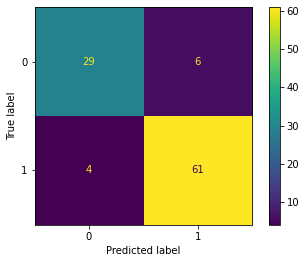

In [146]:
plot_confusion_matrix(lr, X_test, y_test);

In [179]:
# TN = 29
# FP = 6
# FN = 4
# TP = 61

In [180]:
print(classification_report(y_test,lr.predict(X_test)))

# Code adapted from Local Lesson: "More Classification Tools"

              precision    recall  f1-score   support

           0       0.01      0.71      0.03        49
           1       1.00      0.95      0.98     50051

    accuracy                           0.95     50100
   macro avg       0.51      0.83      0.50     50100
weighted avg       1.00      0.95      0.98     50100



### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: Based on the earlier questions regarding the ethics of minimizing false positives vs false negatives, we'd probably want to slean towardsminimizing false negatives. Telling people they're sick when they might not be is, perhaps, safer for the sake of one's health, though financially and emotionally burdensome. But that burden is probably be a preferable alternative to death. 

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: Yes, having unblanced classes is usually a problem because establishing a pattern among a minority class, especially one we're trying to predict, is made much more difficult by a small sample size. That said, this data had about a 3:2 ratio between positive and negative CKD cases, which seems fairly balanced. 

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: It's generally harder to recognize things we don't see very often. If a practioiner was trying to identify whether someone in Alaska has malaria, but that practioner had never seen a case of malaria before, it could be fairly difficiult to assess. We would need to observe known cases among Alaskans before we could consistently identify new cases. A model faces the same problem. If we wanted to predict which Alaskans in a set of 500 have malaria, but only had two known positive cases in our data, the model woiuldn't capture all of the possible symptoms, factors, and presentations of malaria contractions very well, making it unreliable.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [151]:
# Sample with replacement:

bootstrap = df[df['class'] == 1].sample(200000, replace=True, random_state = 42) 

In [152]:
new_df = pd.concat([df,bootstrap])

In [156]:
new_df['class'].value_counts()

1    200250
0       150
Name: class, dtype: int64

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [157]:
X = new_df.drop(columns = ['pc',
                       'pcc',
                       'class',
                       'rbc_normal',
                       'ba_notpresent',
                       'htn_no',
                       'dm_no',
                       'cad_no',
                       'appet_good',
                       'pe_no',
                       'ane_no'])
y = new_df['class']

In [161]:
X.shape
y.shape

(200400,)

In [162]:
X = X.fillna(X.median())

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [165]:
# Use same model params as above:

lr2 = LogisticRegression(penalty='l2', C=10, random_state=42)

In [167]:
lr2.fit(X_train,y_train)

/Users/ericschultz/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
lr2.score(X_test,y_test)

0.9991816367265469

In [169]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(y_test,lr2.predict(X_test)))

# Code adapted from Local Lesson: "More Classification Tools"

              precision    recall  f1-score   support

           0       1.00      0.16      0.28        49
           1       1.00      1.00      1.00     50051

    accuracy                           1.00     50100
   macro avg       1.00      0.58      0.64     50100
weighted avg       1.00      1.00      1.00     50100



In [176]:
preds = lr.predict(X_test)

In [177]:
confusion_matrix(y_test, preds)

array([[   35,    14],
       [ 2317, 47734]])

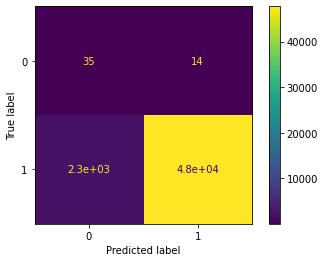

In [178]:
plot_confusion_matrix(lr, X_test, y_test);

In [181]:
# Strangely, the model seemed to improve. 
# This might be due to the excecptionally high number of imputed median values.
# Considering the above question regarding ethical considerations in 
# minimizing false negatives, we've effectively done so, but again, while this is perhaps
# preferable to death, it still raises questions of model reliability. 

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!